In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import ast
import re

%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman'


In [2]:
characters = pd.read_csv('../data/character.metadata.tsv', sep='\t', header=None)
characters.columns = [
    'wikipedia_movie_id',
    'freebase_movie_id',
    'movie_release_date',
    'character_name',
    'actor_dob',
    'actor_gender',
    'actor_height',
    'actor_ethnicity',
    'actor_name',
    'actor_age',
    'freebase_character_map_1',
    'freebase_character_map_2',
    'freebase_character_map_3'
]
characters.head()

,wikipedia_movie_id,freebase_movie_id,movie_release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_map_1,freebase_character_map_2,freebase_character_map_3
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [3]:
# Calculate missing data ratio for each column
missing_ratio = characters.isnull().mean()

# Display the missing data ratio for each column
print("Missing Data Ratio for Each Column:")
print(missing_ratio)


# Convert 'movie_release_date' to datetime
characters['movie_release_date'] = pd.to_datetime(characters['movie_release_date'], errors='coerce')

# Summary statistics
#print(characters.describe())

# Visualize actor gender distribution
#sns.countplot(x='actor_gender', data=characters)
#plt.title('Actor Gender Distribution')
#plt.show()


Missing Data Ratio for Each Column:
wikipedia_movie_id          0.000000
freebase_movie_id           0.000000
movie_release_date          0.022178
character_name              0.572205
actor_dob                   0.235528
actor_gender                0.101203
actor_height                0.656457
actor_ethnicity             0.764665
actor_name                  0.002725
actor_age                   0.350841
freebase_character_map_1    0.000000
freebase_character_map_2    0.572183
freebase_character_map_3    0.001808
dtype: float64


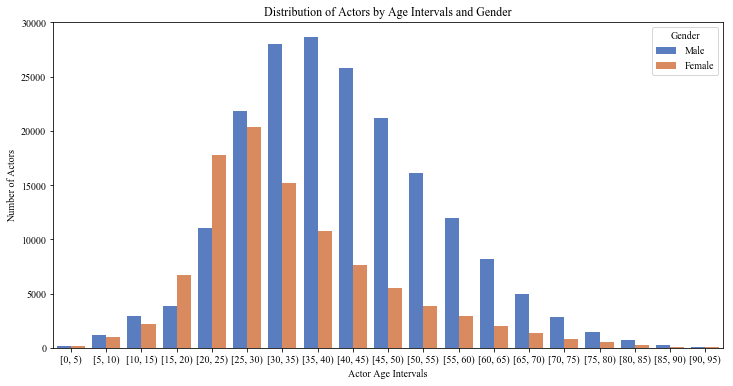

In [4]:
# Drop rows with missing values in 'actor_age' and 'actor_gender' for better visualization
data_for_plot = characters.dropna(subset=['actor_age', 'actor_gender'])

# Create age intervals
age_intervals = pd.cut(data_for_plot['actor_age'], bins=range(0, 100, 5), right=False)

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a countplot for each gender with age intervals of 3
sns.countplot(x=age_intervals, hue='actor_gender', data=data_for_plot, palette='muted', hue_order=['M', 'F'])

# Set labels and title
plt.title('Distribution of Actors by Age Intervals and Gender')
plt.xlabel('Actor Age Intervals')
plt.ylabel('Number of Actors')

# Display the legend
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


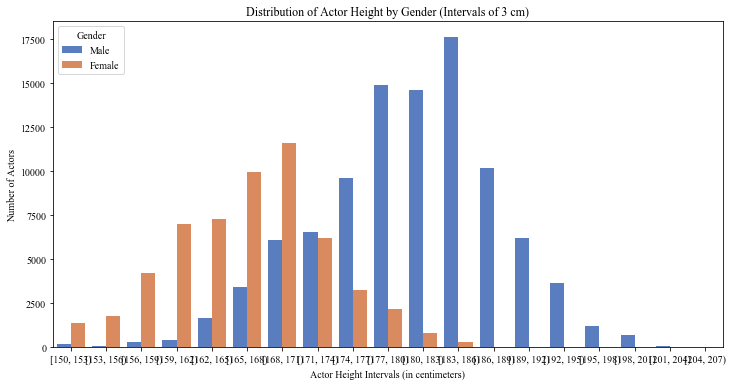

In [5]:
# Drop rows with missing values in 'actor_height' and 'actor_gender'
data_for_height_plot = characters.dropna(subset=['actor_height', 'actor_gender'])

# Convert height to centimeters
data_for_height_plot['actor_height_cm'] = data_for_height_plot['actor_height'] * 100

# Create height intervals in centimeters
height_intervals = pd.cut(data_for_height_plot['actor_height_cm'], bins=range(150, 210, 3), right=False)

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a countplot for height intervals with gender as hues
sns.countplot(x=height_intervals, hue='actor_gender', data=data_for_height_plot, palette='muted', hue_order=['M', 'F'], dodge=True)

# Set labels and title
plt.title('Distribution of Actor Height by Gender (Intervals of 3 cm)')
plt.xlabel('Actor Height Intervals (in centimeters)')
plt.ylabel('Number of Actors')

# Display the legend with specified labels
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.show()


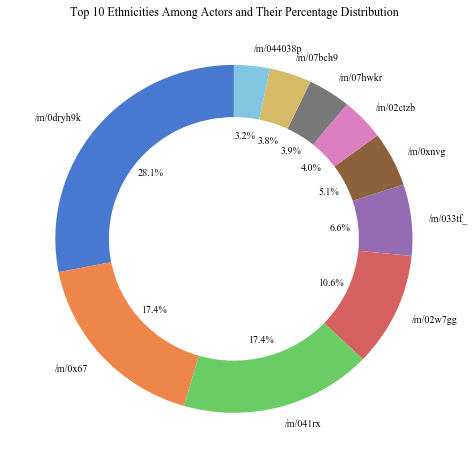

In [12]:
# Drop rows with missing values in 'actor_ethnicity' and 'actor_gender'
data_for_ethnicity_plot = characters.dropna(subset=['actor_ethnicity', 'actor_gender'])

# Calculate the percentage distribution of each ethnicity
ethnicity_percentage = data_for_ethnicity_plot['actor_ethnicity'].value_counts(normalize=True) * 100

# Select the top 10 ethnicities
top_10_ethnicities = ethnicity_percentage.head(10)

# Set up the figure and axes
plt.figure(figsize=(8, 8))

# Create a pie chart for the top 10 ethnicities
plt.pie(top_10_ethnicities, labels=top_10_ethnicities.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'), wedgeprops=dict(width=0.3))

# Set labels and title
plt.title('Top 10 Ethnicities Among Actors and Their Percentage Distribution')

# Show the plot
plt.show()
